# Display Volatility by weekday and week of the month 

Date
2022-03-30 00:00:00+05:30   2022-03-30 00:00:00+05:30
2022-03-29 00:00:00+05:30   2022-03-29 00:00:00+05:30
2022-03-28 00:00:00+05:30   2022-03-28 00:00:00+05:30
2022-03-25 00:00:00+05:30   2022-03-25 00:00:00+05:30
2022-03-24 00:00:00+05:30   2022-03-24 00:00:00+05:30
Name: Date, dtype: datetime64[ns, Asia/Kolkata]


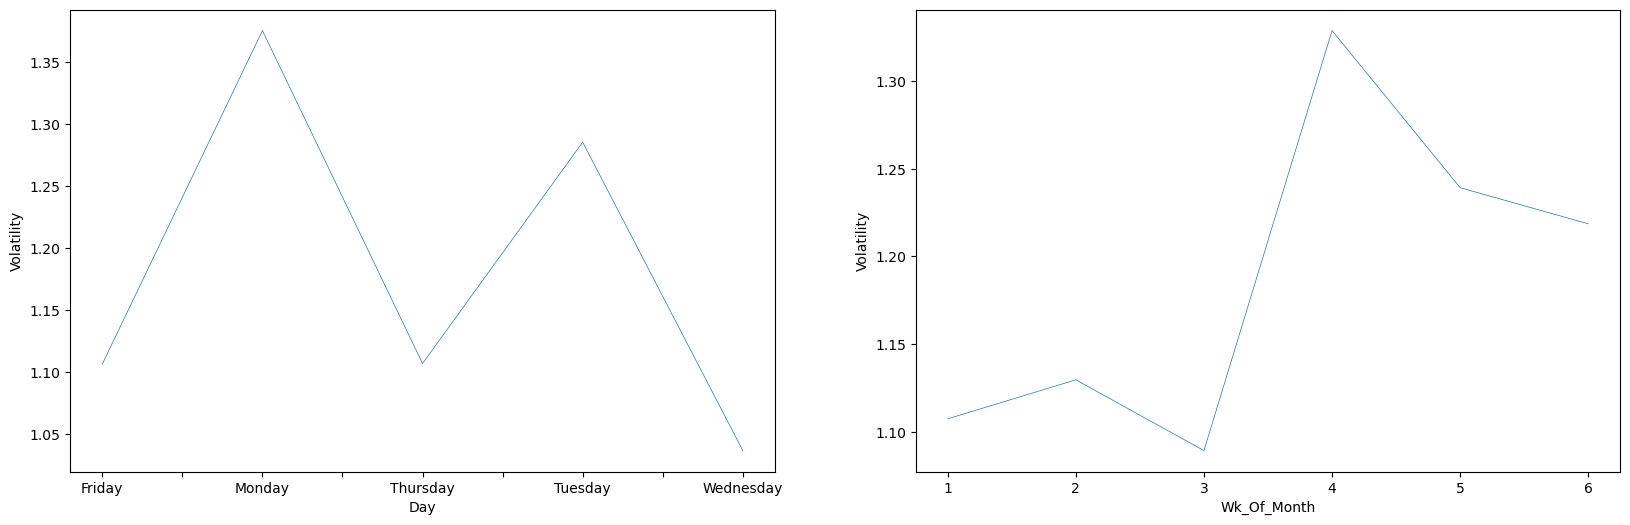

In [30]:
import pandas as pd
import yfinance
import datetime
import matplotlib.pyplot as plt


def get_week_of_month(date):
  """
    Get the week number a given date falls in a particular month 
    Input: date in "yyyy-mm-dd" format
    Output: Week of the Month

  """
  start_of_month = date.replace(day=1) # replace the date passed as a parameter by date of 1st of the month
  #find the date of the start of the week in which the start of that month falls
  start_of_week = start_of_month - pd.DateOffset(days = start_of_month.weekday()) #start_of_month.weekday():count from Monday which is 0
  week_of_month = (date - start_of_week).days // 7 + 1 # Divide number of days from start of week of 1st day of month and add 1
  return week_of_month

index = '^NSEI' # Nifty50 , replace for any other stock or index
startDate = "2021-4-1"
endDate = "2022-3-31"

ticker = yfinance.Ticker(index)
df = ticker.history(interval="1d",start=startDate, end=endDate) 

df.sort_values(by='Date', ascending = False, inplace=True) # sort date in descending order, 
# sorting needs to be done before we convert to datetime object else we will get the following error
# ---- ValueError: 'Date' is both an index level and a column label, which is ambiguous. ----------

df['Date'] = pd.to_datetime(df.index) # Dates will be printed in descending order

print(df['Date'].head())

df['Volatility'] = ((df['High'] - df['Low']) / df['Low']) * 100
df['Day'] = df['Date'].dt.day_name()
df['Wk_Of_Month'] = df['Date'].apply(lambda x:get_week_of_month(x))

df_WkDay_Volatility = df.groupby(['Day']).Volatility.mean()
df_WkOfMonth_Volatility = df.groupby(['Wk_Of_Month']).Volatility.mean()

fig = plt.figure(figsize=(20,6))
graph1 = fig.add_subplot(121,ylabel = 'Volatility') 
df_WkDay_Volatility.plot(ax = graph1, lw=0.5)
graph2 = fig.add_subplot(122,ylabel = 'Volatility')
df_WkOfMonth_Volatility.plot(ax = graph2, lw=0.5)
plt.show()